In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
f = h5py.File('/home/dataset/sift/sift-128-euclidean.hdf5')

In [3]:
gt = f['neighbors']

In [47]:
# topk distribution
def topk_dist(query, bucket_path = "/tmp/test_pag_sift/bucket_111.txt"):
  gt_i = list(gt[query][:10])
  topk_index = [[] for _ in range(len(gt_i))]
  fb = open(bucket_path, "r")
  lines = list(reversed(fb.readlines()))
  for i in range(len(lines)):
    line = lines[i]
    line_split = line.split(' ')[:-1]
    line_content = [int(i) for i in line_split]
    # print(line_content)
    # break
    # print(line_content)
    for j in range(len(gt_i)):
      # print(gt_i[j])
      if line_content.count(gt_i[j]) > 0:
        topk_index[j].append(i)
    # break
  fb.close()
  return topk_index

In [48]:
def plot(datas):
    fig, ax = plt.subplots(figsize=(8, 4))
    N = len(datas)
    cmap = plt.get_cmap('Paired', N)
    for i, positions in enumerate(datas):
        # 这里 topk 的编号从 1 开始，即 top1, top2, ...
        color = cmap(i)
        y = [i + 1] * len(positions)
        if positions:  # 如果该列表不为空，则绘制对应的点
            ax.scatter(positions, y, s=100, label=f"top{i + 1}", color=color)

    # 设置坐标轴标签和标题
    ax.set_xlabel("Position")
    ax.set_ylabel("Top k")
    ax.set_title("Positions of topk")
    ax.set_yticks(range(1, len(datas) + 1))  # Y 轴显示各 topk 的编号
    ax.grid(True)

    # 如果希望显示图例，可以取消下面代码的注释
    ax.legend(title="Topk Groups")

    plt.tight_layout()
    plt.show()

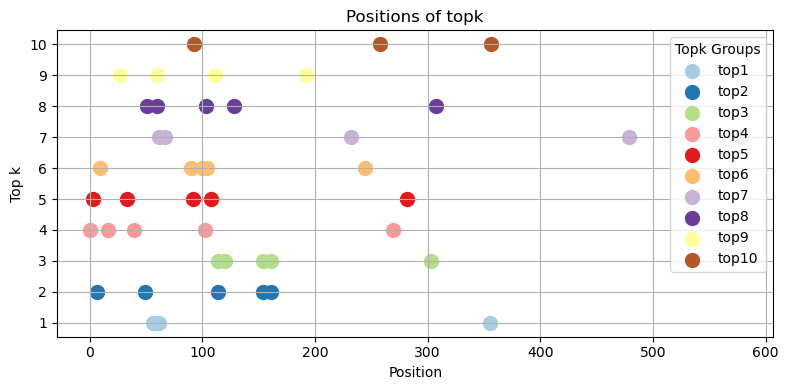

In [49]:
data2 = topk_dist(1315, "/tmp/test_pag_sift/bucket_1315.txt")
plot(data2)

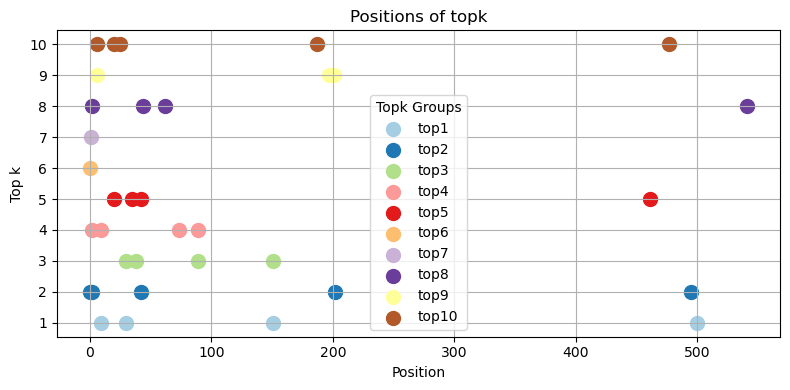

In [50]:
data1 = topk_dist(111)
plot(data1)

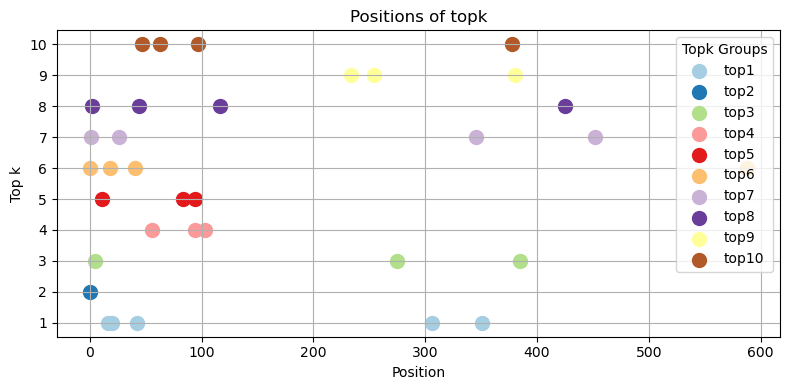

In [51]:
data3 = topk_dist(2025, "/tmp/test_pag_sift/bucket_2025.txt")
plot(data3)

In [ ]:
# bucket recall@10 == 0.9的分布的query数目

In [72]:
# 0, 10, 20, 40, 80, 160, 320, 640
distribution = [1231, 2393, 4119, 6154, 7873]
hist = [distribution[i] - distribution[i - 1] for i in range(1, len(distribution))]
hist

[1162, 1726, 2035, 1719]

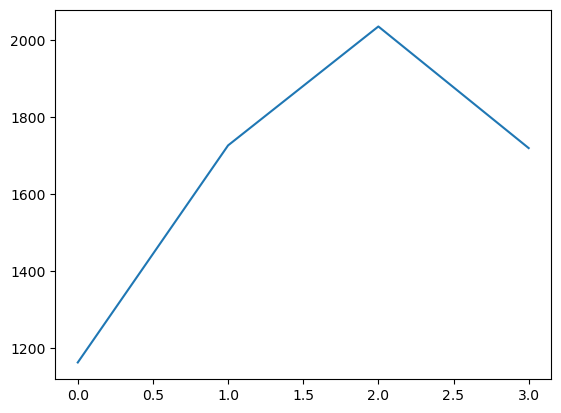

In [73]:
plt.plot(hist)